# Modelling

In this notebook I'll be starting the modelling phase of my project.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
X_train_s = pd.read_pickle('data1/X_train_s.pkl')
X_val_s = pd.read_pickle('data1/X_val_s.pkl')
X_test_s = pd.read_pickle('data1/X_test_s.pkl')
y_train = pd.read_pickle('data1/y_train.pkl')
y_val = pd.read_pickle('data1/y_val.pkl')
y_test = pd.read_pickle('data1/y_test.pkl')
df=pd.read_pickle("data1/df.pkl")


Data has been loaded.

## Linear Regression

### Linearity

Since we are doing Linear Regression we should check for linearity between our variables.

In [3]:
#concat the train data
train_data = pd.concat([X_train_s, y_train], axis=1)

#set up the corr matrix
correlation_matrix = train_data.corr()

In [4]:
#get corr matrix
correlation_values = correlation_matrix["market_value"]

#sort the correlation values in descending order and get the top 10 for positive and negative correlation
sortedposcorr = correlation_values.sort_values(ascending=False).head(20)
sortednegcorr= correlation_values.sort_values(ascending=True).head(20)

print(sortedposcorr)


market_value                     1.000000
Country_Russia                   0.011604
sub_position_Central Midfield    0.007945
Country_Morocco                  0.007656
league_id_ES1                    0.007512
height_in_cm                     0.006708
Country_Cote d'Ivoire            0.006066
sub_position_Second Striker      0.004974
Country_Scotland                 0.004743
last_season_x                    0.004453
Country_Spain                    0.004043
Country_Denmark                  0.003680
position_Midfield                0.003362
sub_position_Centre-Back         0.003239
age                              0.002990
Country_Ukraine                  0.002971
league_id_UKR1                   0.002880
Country_Portugal                 0.002694
league_id_FR1                    0.002657
league_id_RU1                    0.002654
Name: market_value, dtype: float64


In [5]:
print(sortednegcorr)

sub_position_Right Midfield       -0.008534
Country_Turkey                    -0.008409
Country_England                   -0.008379
league_id_TR1                     -0.007212
sub_position_Left-Back            -0.006865
Country_Brazil                    -0.006024
month                             -0.005411
Country_Greece                    -0.005313
yellow_cards                      -0.005298
sub_position_Attacking Midfield   -0.004437
net_transfer_record               -0.004117
assists                           -0.004090
minutes_played                    -0.004055
league_id_DK1                     -0.003989
league_id_L1                      -0.003629
year                              -0.003471
sub_position_Right Winger         -0.003334
sub_position_Right-Back           -0.003228
Country_Croatia                   -0.003192
Country_Senegal                   -0.003088
Name: market_value, dtype: float64


 We dont seem to have any strong postive or negative correlations. This could be down to the scaling as in the EDA step there was a decent amount of correlation in the dataset, but we can likely say that a linear regression is not the best machine learning algorithm for this dataset. We will do it anyway as a baseline model however.

### Base Model

The first step in Modelling for my project will be a baseline linear regression model.

In [6]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

#instantiate
LinReg=LinearRegression()

#fit
LinReg.fit(X_train_s,y_train)

#Score
#Train
print(f"train R^2 score:{LinReg.score(X_train_s,y_train)}")

#Val
print(f"validation R^2 score:{LinReg.score(X_val_s,y_val)}")


train R^2 score:0.693051423049036
validation R^2 score:0.6898009108330572


The training R^2 score of 0.6933 indicates our Linear Regression model captures about 70% of training variance. The validation R^2 score of 0.69 also indicates about 70% variance.This is decent as higher R-squared values, closer to 1, signify a better fit hence showcasing the model's moderate ability to recognise and capture patterns in the validation set.

### Coefficients & Intercepts

In [7]:
LinReg.intercept_

5096796.852634913

My Linear Regression Model has a y-intercept of approximately €5.1 million indicating that when all my other features are set to zero (have no effect) the baseline value of the player is 5.1 million euros.

In [8]:

coefficients = LinReg.coef_

# set up a dataframe
coefficientsdf = pd.DataFrame({'Feature': LinReg.feature_names_in_, 'coefficients': coefficients})

#sort in desc order
coefficientsdf = coefficientsdf.sort_values(by='coefficients', ascending=False)

#display the 10 highest coefficients
print(coefficientsdf.head(10))


                Feature  coefficients
63        Country_Other  2.515608e+19
70        Country_Spain  1.665870e+19
56       Country_France  1.448118e+19
72       Country_Turkey  1.355611e+19
61  Country_Netherlands  1.352889e+19
51       Country_Brazil  1.344074e+19
65     Country_Portugal  1.308863e+19
57      Country_Germany  1.301109e+19
59        Country_Italy  1.263444e+19
66       Country_Russia  1.212863e+19


In [9]:
#display the 10 lowest coefficients
print(coefficientsdf.tail(10))


                        Feature  coefficients
17                   foot_right -5.819010e+18
37                league_id_ES1 -5.909463e+18
29     sub_position_Left Winger -6.932207e+18
32    sub_position_Right Winger -6.984300e+18
30       sub_position_Left-Back -8.518018e+18
33      sub_position_Right-Back -8.947421e+18
25  sub_position_Centre-Forward -9.637604e+18
24     sub_position_Centre-Back -1.263725e+19
27      sub_position_Goalkeeper -1.856675e+19
21            position_Midfield -2.387822e+19


#### Analysis:

- **Positive Coefficients:** Features like 'Country_Other,' 'Country_Spain,' etc., have large positive coefficients, indicating a strong positive influence on the target variable.They seem to be majority in the country collumns suggesting that for this specific dataset, countries have the strongest positive influence in a players valuation.

- **Negative Coefficients:** Features like 'position_Goalkeeper,' 'position_Midfield,' etc., have large negative coefficients, suggesting a strong negative influence on the target variable. They seem to be mostly in the sub-position collumns suggesting that the specific subposition of a player is one of the leading factors for a lower transfer fee.


## Decision Tree Regressor

I will be setting up a basic, unoptimised Decision Tree Regressor to get a gauge of how it would look.

In [10]:
#import DT regressor
from sklearn.tree import DecisionTreeRegressor

#instantiate
DTmodel=DecisionTreeRegressor()

#fit
DTmodel.fit(X_train_s,y_train)

#Score
#Train
print(DTmodel.score(X_train_s,y_train))

#Val
print(DTmodel.score(X_val_s,y_val))

0.999995981097694
0.8743630296286344


Here I get a train score of 99.999% accuracy which would be great if the validation score followed suit however the validation score is quite a bit lower suggesting quite a significant overfit even if these values are good.

### GridSearch & Cross-Validation

Since I have quite a significant amount of overfitting I need to tune my hyperparameters and run a gridsearch. I can do this by setting up a parameter grid and passing that into my decision tree regressor model with a 5-fold cross validation.I will be tuning 4 hyperparameters including "max_depth","min_samples_split","min_samples_leaf","criterion" with a range of values for each.

In [11]:
from sklearn.model_selection import GridSearchCV

#instantiate
dtmodel = DecisionTreeRegressor()

# Define the parameter grid
paramgrid = {
    "max_depth": [2, 4, 6, 8, 10],  #how deep the tree is allowed to go set between 2-10 in steps of 2
    "min_samples_split": [2, 4, 6, 8, 10],  #minimum number of samples required to split node between 2-10 in steps of 2
    "min_samples_leaf": [1, 2, 4, 6, 8, 10],  #minimum number of samples required at leaf node between 1-10
    "criterion": ["squared_error"],  # splitting criteria squared error
}

#import gridsearchcv, link it to our pipeline and fit to our train
grid_search = GridSearchCV(dtmodel, paramgrid,verbose=3, cv=5)
grid_search.fit(X_train_s, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.559 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.568 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.585 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.561 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.578 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.559 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.568 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=2, min_samples_leaf=1

[CV 2/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=8;, score=0.568 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=8;, score=0.585 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=8;, score=0.561 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=8;, score=0.578 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=10;, score=0.559 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=10;, score=0.568 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=10;, score=0.585 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=2, min_samples_leaf=4, min_samples_split=10;, score=0.561 total time=   0.3s
[CV 

[CV 3/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.585 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.561 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.578 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.559 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.568 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.585 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.561 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.578 total time=   0.3s


[CV 4/5] END criterion=squared_error, max_depth=4, min_samples_leaf=2, min_samples_split=10;, score=0.684 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_depth=4, min_samples_leaf=2, min_samples_split=10;, score=0.720 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=4, min_samples_leaf=4, min_samples_split=2;, score=0.712 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=4, min_samples_leaf=4, min_samples_split=2;, score=0.712 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=4, min_samples_leaf=4, min_samples_split=2;, score=0.729 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_depth=4, min_samples_leaf=4, min_samples_split=2;, score=0.684 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=4, min_samples_leaf=4, min_samples_split=2;, score=0.720 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=4, min_samples_leaf=4, min_samples_split=4;, score=0.712 total time=   0.6s
[CV 2/

[CV 5/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=6;, score=0.720 total time=   0.5s
[CV 1/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=8;, score=0.712 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=8;, score=0.712 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=8;, score=0.729 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=8;, score=0.684 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=8;, score=0.720 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=10;, score=0.712 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_depth=4, min_samples_leaf=8, min_samples_split=10;, score=0.712 total time=   0.6s
[CV 3/

[CV 1/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=4;, score=0.780 total time=   0.9s
[CV 2/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=4;, score=0.794 total time=   0.9s
[CV 3/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=4;, score=0.803 total time=   0.8s
[CV 4/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=4;, score=0.781 total time=   0.8s
[CV 5/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=4;, score=0.793 total time=   0.8s
[CV 1/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=6;, score=0.780 total time=   0.9s
[CV 2/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=6;, score=0.794 total time=   0.9s
[CV 3/5] END criterion=squared_error, max_depth=6, min_samples_leaf=2, min_samples_split=6;, score=0.803 total time=   0.9s
[CV 4/5]

[CV 2/5] END criterion=squared_error, max_depth=6, min_samples_leaf=6, min_samples_split=10;, score=0.795 total time=   0.8s
[CV 3/5] END criterion=squared_error, max_depth=6, min_samples_leaf=6, min_samples_split=10;, score=0.803 total time=   0.9s
[CV 4/5] END criterion=squared_error, max_depth=6, min_samples_leaf=6, min_samples_split=10;, score=0.778 total time=   0.9s
[CV 5/5] END criterion=squared_error, max_depth=6, min_samples_leaf=6, min_samples_split=10;, score=0.793 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=6, min_samples_leaf=8, min_samples_split=2;, score=0.782 total time=   0.7s
[CV 2/5] END criterion=squared_error, max_depth=6, min_samples_leaf=8, min_samples_split=2;, score=0.793 total time=   0.8s
[CV 3/5] END criterion=squared_error, max_depth=6, min_samples_leaf=8, min_samples_split=2;, score=0.803 total time=   0.9s
[CV 4/5] END criterion=squared_error, max_depth=6, min_samples_leaf=8, min_samples_split=2;, score=0.780 total time=   0.9s
[CV 

[CV 3/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.835 total time=   1.3s
[CV 4/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.835 total time=   1.4s
[CV 5/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.831 total time=   1.2s
[CV 1/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.824 total time=   1.2s
[CV 2/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.836 total time=   1.2s
[CV 3/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.835 total time=   1.3s
[CV 4/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.835 total time=   1.3s
[CV 5/5] END criterion=squared_error, max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.832 total time=   1.3s
[CV 1/5]

[CV 4/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=2;, score=0.833 total time=   1.3s
[CV 5/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=2;, score=0.832 total time=   1.3s
[CV 1/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=4;, score=0.827 total time=   1.3s
[CV 2/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=4;, score=0.836 total time=   1.3s
[CV 3/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=4;, score=0.833 total time=   1.3s
[CV 4/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=4;, score=0.833 total time=   1.2s
[CV 5/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=4;, score=0.831 total time=   1.3s
[CV 1/5] END criterion=squared_error, max_depth=8, min_samples_leaf=6, min_samples_split=6;, score=0.827 total time=   1.3s
[CV 2/5]

[CV 5/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10, min_samples_split=8;, score=0.828 total time=   1.3s
[CV 1/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.818 total time=   1.1s
[CV 2/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.833 total time=   1.1s
[CV 3/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.831 total time=   1.3s
[CV 4/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.835 total time=   1.2s
[CV 5/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.828 total time=   1.2s
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.837 total time=   1.7s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.847 total time=   

[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=6;, score=0.835 total time=   1.6s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=6;, score=0.851 total time=   1.7s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=6;, score=0.845 total time=   1.7s
[CV 4/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=6;, score=0.840 total time=   1.7s
[CV 5/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=6;, score=0.848 total time=   1.7s
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=8;, score=0.835 total time=   1.8s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=8;, score=0.852 total time=   1.7s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=4, min_samples_split=8;, score=0.845 total time=   1.7s


[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.845 total time=   1.6s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.838 total time=   1.7s
[CV 4/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.846 total time=   1.7s
[CV 5/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.843 total time=   1.7s
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.828 total time=   1.6s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.845 total time=   1.6s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.838 total time=   1.6s
[CV 4/5] END criterion=squared_error, max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.846 total time=

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=3)

My gridsearch cross-validation has run and I can now pass that into `.best_score_` and `.best_estimator_` attributes to get my best-fitted model.

In [12]:

#get best hyperparameters and their corresponding score
bestscore = grid_search.best_score_
bestmodel = grid_search.best_estimator_

print(bestscore)
print(bestmodel)


0.8445698448222171
DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, min_samples_split=6)


My optimal Decision Tree model here, configured with max_depth=10, min_samples_leaf=6, and min_samples_split=6, shows a cross-validated score of approximately 0.84% which whilst not as good as our basic decision tree model from before has now protected us from overfitting on the training set.

### Optimised Decision Tree Regressor

In [17]:

#instantiate
DT=DecisionTreeRegressor(max_depth=10,min_samples_leaf=6,min_samples_split=6)

#fit
DT.fit(X_train_s,y_train)

# Predictions
y_train_pred = DT.predict(X_train_s)
y_val_pred = DT.predict(X_val_s)

#Score
#Train
print(DT.score(X_train_s,y_train))

#Val
print(DT.score(X_val_s,y_val))

0.8894014750392316
0.8462871413891841


As we can see although our train score has gone down by almost 10% and our test score has gone down by 3%. Our model is no longer overfitted.

## Model Evaluation

### Decision Tree Plot

In [18]:
#pip install dtreeviz

In [19]:
#from dtreeviz.trees import dtreeviz

# Visualize the decision tree with dtreeviz
#viz = dtreeviz(DT, X_train_s, y_train, feature_names=X_train_s.columns.tolist(), target_name='market_value')
#viz.view()


As we can see our optimised decision tree is extremely extensive in length and 

### Mean Absolute Error & Mean Squared Error

We can use Mean Absolute Error and Mean Squared Error as alternative metrics for R^2 to evaluate our model.

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# Calculate Mean Absolute Error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

# Print the metrics
print("Train MSE:", mse_train)
print("Validation MSE:", mse_val)
print("\nTrain MAE:", mae_train)
print("Validation MAE:", mae_val)


Train MSE: 12511684463760.807
Validation MSE: 17159404951433.264

Train MAE: 1688304.5704686358
Validation MAE: 1870482.9014710502


These values seem a bit strange considering the high R-Squared values i got previously. I'll have to do further investigation into this.

### Feature Importance

We can analyse the importance of each feature using the .feature_importances_ attribute.

In [21]:
#get the feature importance for my best model
feature_importance = DT.feature_importances_

# set up a dataframe
importance_df = pd.DataFrame({'Feature': X_train_s.columns, 'Importance': feature_importance})

#sort in desc order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#display the feature importances
importance_df


,Feature,Importance
2,highest_ever_market_value,0.736383
3,age,0.084337
6,year,0.067186
11,minutes_played,0.054220
14,national_team_players,0.018533
...,...,...
26,sub_position_Defensive Midfield,0.000000
28,sub_position_Left Midfield,0.000000
30,sub_position_Left-Back,0.000000
36,league_id_DK1,0.000000


In [22]:
importance_df.head(10)

,Feature,Importance
2,highest_ever_market_value,0.736383
3,age,0.084337
6,year,0.067186
11,minutes_played,0.054220
14,national_team_players,0.018533
7,goals,0.005888
13,net_transfer_record,0.005565
8,assists,0.005386
5,month,0.004554
12,player_club_id,0.003066


We can make a stacked bar chart to visualise this importance.

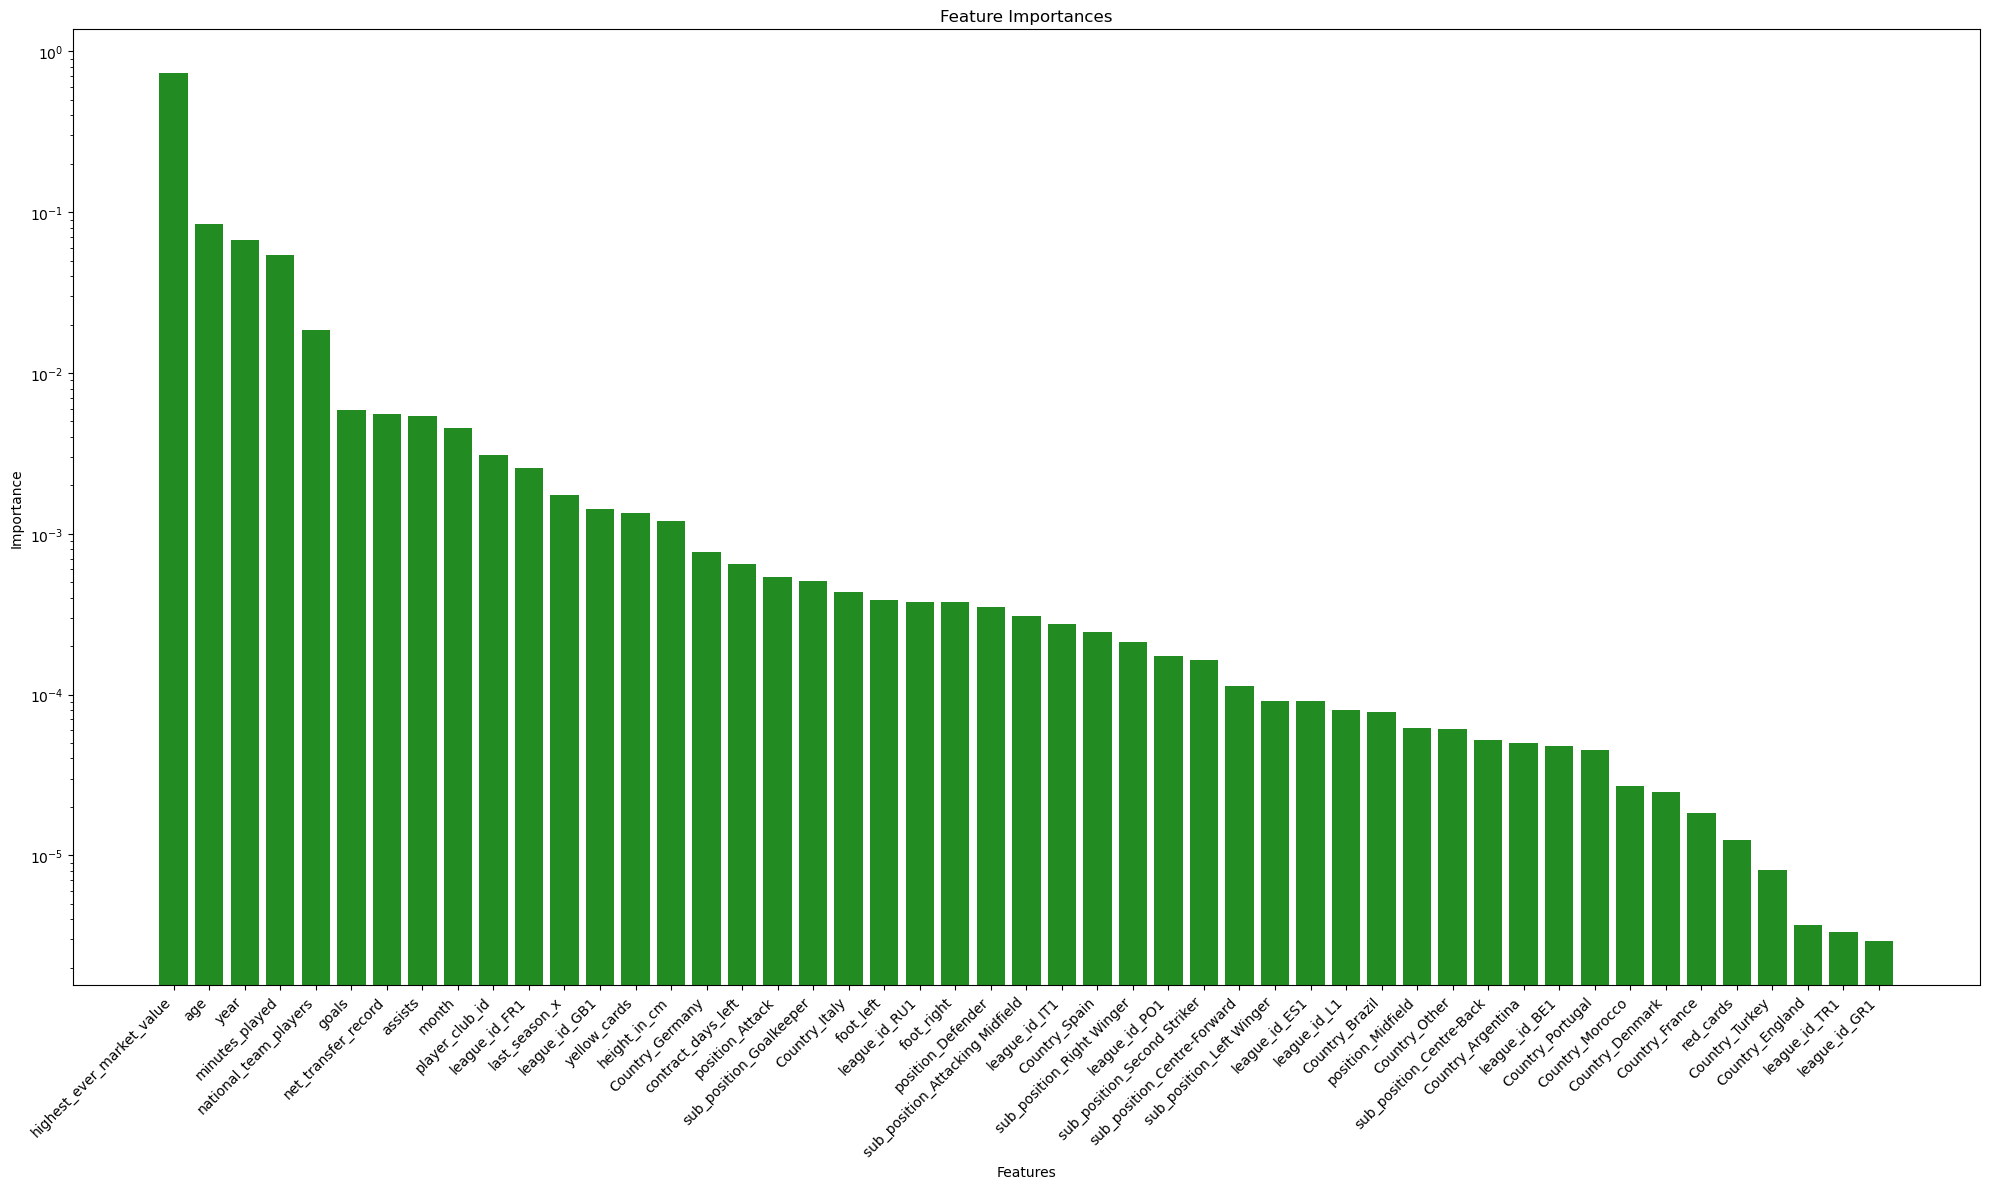

In [23]:
import matplotlib.pyplot as plt


#filter rows where importance  not 0
filtered_importance_df = importance_df[importance_df['Importance'] > 0]

#create stacked bar chart
plt.figure(figsize=(20, 12))
plt.bar(filtered_importance_df['Feature'], filtered_importance_df['Importance'], color='forestgreen')


# log scale my y axis
plt.yscale('log')

#layout graphing
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



`age`:
Age ranks highest in importance, suggesting its substantial role in influencing market value predictions.

`year`:
The year is also an important temporal factor, indicating that market values are influenced by trends or changes over time.

`minutes_played`:
Playing time is a significant factor, suggesting its impact on predicting player market values.

`national_team_players`:
How many national team players a team has is also significant as better teams usually have more of them.

`net_transfer_record`:
The transfer record of the club, reflected in the net transfer record, plays a role in determining market values.

`goals`:
Goal-scoring ability is considered, indicating its influence on predicting player market values.

`assists`:
Contributions to goals through assists also contribute to predictions.

`month`:
The month may indicate periodic trends, but it holds relatively less importance compared to other features.

`player_club_id`:
The actual club id holds less information about the valuation than certain attributes of the club which is a bit strange.

These importance scores guide my understanding of which features are more influential in determining player market values and help in feature selection and further analysis.